In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
from seaborn import distplot, heatmap, clustermap
from scipy.stats import spearmanr, pearsonr, pearson3
from pySankey import sankey

In [58]:
auc = pd.read_table('auc_mtx_mac.txt', index_col=0, header=0 )
cell_info = pd.read_table( 'cellInfo2.txt' )
cell_info2 = cell_info[ cell_info.index.isin( auc.columns ) ]

In [59]:
auc.columns

Index(['GF_TGGATCGACCGC', 'GF_AGCCGTCTTGGG', 'GF_CTGCCAGGGGTG',
       'WT_ACTTGCTCATTG', 'GF_TTTTTGTCAGAG', 'WT_TTCGAAAGGGAC',
       'GF_CGGGAAAGCGCC', 'GF_CCGGGATTACTT', 'GF_TCGGAGGGTGGG',
       'GF_GGCATTGAGTGT',
       ...
       'WT_CCATGTACCCCA', 'GF_TTGTCGCATGCN', 'GF_GGAAGGCTACAG',
       'WT_CTCGTAAAACTG', 'WT_ATTATGCGATGA', 'GF_CTGTTTCTTATA',
       'GF_ACTTGGCGGTCA', 'WT_CTAGTGAAAGTG', 'WT_TCGTTCCCACGT',
       'GF_CGAACCCTGCCC'],
      dtype='object', length=296)

In [60]:
aucz = ((auc.transpose() - auc.mean(1))/auc.std(1)).transpose()
aucz.transpose().head()

,Tfdp1_extended (133g),Nfyb_extended (47g),Nfyb (28g),E2f2_extended (187g),E2f2 (147g),E2f8_extended (36g),E2f8 (19g),Sin3a_extended (770g),Sin3a (334g),Mxi1_extended (2236g),...,Rfx2_extended (52g),Rfx2 (37g),Tcf12_extended (17g),Ets1_extended (10g),Ar_extended (19g),Foxj1_extended (17g),Brf2_extended (10g),Nr2f6_extended (15g),Xrcc4_extended (335g),Zfp148_extended (41g)
GF_TGGATCGACCGC,0.328464,0.590177,0.521582,-1.383219,-1.187652,-0.933751,-0.778557,1.193100,0.646874,-0.846633,...,0.242949,0.505115,-1.071423,-0.867500,0.836262,-0.053671,4.737561,0.174459,-0.658069,-0.131078
GF_AGCCGTCTTGGG,-1.050428,-0.700313,-0.247497,-0.013438,-1.063722,-0.501183,-0.778557,0.032502,-0.018893,1.046967,...,-0.423235,-0.042179,1.948174,-0.659616,-0.461453,-0.989495,-0.450255,-1.109105,-0.282607,-0.936048
GF_CTGCCAGGGGTG,-0.594866,0.712134,1.431461,-2.144545,-2.143045,1.502090,-0.032484,0.906100,-0.005214,-1.136606,...,-0.484154,-1.048418,-0.794345,1.788869,-0.799833,-0.989495,-0.450255,-0.542458,-0.793340,-0.276132
WT_ACTTGCTCATTG,-1.317281,0.809567,0.165601,0.632715,0.763594,-0.282457,0.273191,-0.421538,-0.211938,-1.938478,...,-0.468433,-0.097100,0.538209,-0.477352,0.636796,0.002591,-0.450255,0.208270,-0.257147,-0.296322
GF_TTTTTGTCAGAG,-2.257369,-0.950855,-1.764404,0.587189,0.389767,1.007106,0.347912,1.668120,1.673957,-1.224609,...,-0.881899,-0.599503,0.881639,-0.867500,-0.026903,1.089385,-0.450255,-1.109105,0.333227,0.707366


In [61]:
c2t = cell_info2.CellType
c2t.unique()

array([ 1,  2,  3,  4,  6,  7, 11])

In [62]:
r2t = pd.read_table('csi_clusterID_table.txt').x

In [63]:
(aucz > 2).unstack().head()

GF_TGGATCGACCGC  Tfdp1_extended (133g)    False
                 Nfyb_extended (47g)      False
                 Nfyb (28g)               False
                 E2f2_extended (187g)     False
                 E2f2 (147g)              False
dtype: bool

In [64]:
from collections import Counter
c = []

for (cellid,regulonid),v in ((aucz > 2).unstack()).iteritems():
    if v :
        c.append( ("c%s"%c2t[cellid], "m%s"%r2t[regulonid] ) )

In [65]:
len(c)

1909

In [66]:
df = pd.DataFrame(c)

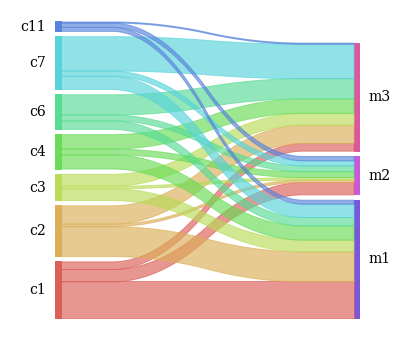

In [67]:
sankey.sankey( df[0], df[1])